In [141]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
#loading our data set 
df = pd.read_csv("C:\\Users\\Gacheru\\Documents\\UNZIP_FOR_NOTEBOOKS_FINAL\\08-Linear-Regression-Models\\Advertising.csv")

#looking at the 3 features and label
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [143]:
#separate the X features from y label
X = df.drop('sales',axis=1)
y = df['sales']
X.shape


(200, 3)

In [144]:
#importing polynomial from preporcessing library from sklearm
from sklearn.preprocessing import PolynomialFeatures


In [145]:
#create an instance 
polynomial_converter = PolynomialFeatures()
#fitting the features data 
polynomial_converter.fit(X)
#tranforming the data to a certaiin degree
poly_features = polynomial_converter.fit_transform(X)


In [146]:
#looking at the first row of X
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [147]:
#looking for the first row of poly_features where we see the first feature terms are just our values
#the others are interraction terms which * the X between themselves and finally the squares
poly_features[0]

#we have gone from 3 features to nine features

array([1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
       5.294601e+04, 8.697780e+03, 1.592292e+04, 1.428840e+03,
       2.615760e+03, 4.788640e+03])

In [148]:
#importing train_test_spli
from sklearn.model_selection import train_test_split

In [149]:
#instead of putting X we put the poly_features we tranformed and fitted
#we are predicting y label using the 9 X features
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)


In [150]:
#calling LinearRegression
from sklearn.linear_model import LinearRegression

In [151]:
#instance creation
model = LinearRegression()

In [152]:
#we are fitting on the 9 features not 3
model.fit(X_train,y_train)

LinearRegression()

In [153]:
#after this we have fitted the model on the LR
# now we test on the tests
test_pred = model.predict(X_test)

In [154]:
#look at perfomance 
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [155]:
#calc MAE and MSE
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
RMSE = np.sqrt(MSE)

In [156]:
model.coef_

array([ 0.00000000e+00,  5.17095811e-02,  1.30848864e-02,  1.20000085e-02,
       -1.10892474e-04,  1.14212673e-03, -5.24100082e-05,  3.34919737e-05,
        1.46380310e-04, -3.04715806e-05])

In [157]:
#Choosing the optimal degree
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

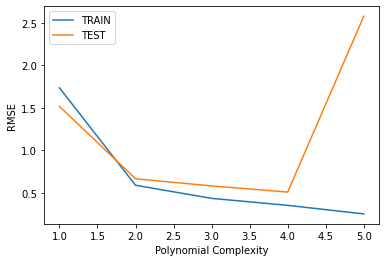

In [158]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [159]:
#model deployment

final_poly = PolynomialFeatures(degree=3,include_bias=False)

In [160]:
final_model = LinearRegression()

In [161]:
full_convX = final_poly.fit_transform(X)
final_model.fit(full_convX,y)


LinearRegression()

In [162]:
#saving the model
from joblib import dump,load
dump(final_model,"poly_model.joblib")
dump(full_convX,'final_conv.joblib')

['final_conv.joblib']

In [168]:
#usage
loaded_conv = load('final_conv.joblib')
loaded_model = load('poly_model.joblib')